# Initialize

In [21]:
# Options

## Debugging level
debug_level = 0

## Plot sizes
plot_width__large   = 1000
plot_height__large  = 600

plot_width__medium  = 600
plot_height__medium = 300

plot_width__small   = 200
plot_height__small  = 150

## Format fonts
# from bokeh.themes.theme import Theme
# import holoviews as hv
# hv.renderer('bokeh').theme.major_label_text_font = "Times New Roman"


In [22]:
# Initialize framework
constants, tools = init_processing(debug_level)
%matplotlib inline


In [23]:
# TODO Provide our own forecasting analysis:
#   - Filter out the customers that have failed to renew or upgrade (after a timeout).
#   - Filter out customers with 3-month subscriptions from 2020 that hvae not been renewed or upgraded.
#   - Build time series based on 

# Initialize

In [24]:
# Import all preprocessed data
atlas           = pd.read_pickle(constants.PREPROCESSED_ATLAS_FILE_PATH)
forecast        = pd.read_pickle(constants.PREPROCESSED_FORECAST_DATA_FILE_PATH)
revenue2020     = pd.read_pickle(constants.PREPROCESSED_REVENUE2020_FILE_PATH)
revenue2020A    = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_FILE_PATH)


In [25]:
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")


In [26]:
atlas.head()

,Number of Users,Invoice Date,Invoice #,Invoice Amount,Subscription,Account Code,Address,Lat,Long,Service Start,Service End,Subscription Duration
Customers,,,,,,,,,,,,
Louisiana Board Of Regents,NaN,2015-03-20 00:00:00-04:00,ATLAS 315,72000.0,1 Year,4700-0-00-00000-18-0000,"1201 N 3rd St #6, Baton Rouge, LA 70802",30.460190,-91.188530,2015-03-18 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
Emporia State University,250.0,2015-05-28 00:00:00-04:00,AJ501,3500.0,1 Year,4700-0-00-00000-16-0000,"1 Kellogg Cir, Emporia, KS 66801",38.392609,-96.181396,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
Morehead State University,100.0,2015-06-23 00:00:00-04:00,AJ502,3500.0,1 Year,4700-0-00-00000-17-0000,"150 University Blvd, Morehead, KY 40351",38.184921,-83.434441,2015-06-10 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
State University Of Ny Potsdam,NaN,2015-06-26 00:00:00-04:00,AJ503,6500.0,1 Year,4700-0-00-00000-32-0000,"44 Pierrepont Ave, Potsdam, NY 13676",44.663780,-74.978409,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
St. Mary'S College Of Maryland,NaN,2015-10-07 00:00:00-04:00,AJ504,750.0,1 Year,4700-0-00-00000-20-0000,"47645 College Dr, St Marys City, MD 20686",38.190601,-76.426300,2015-10-05 00:00:00-04:00,2016-09-30 00:00:00-04:00,365 days


# Most Effective Subscriptions

In [27]:
invoice_data_by_service_start = tools.tool_data_processing.extract_and_append_year_month_quarter(atlas, "Service Start")
invoice_data_by_service_start = invoice_data_by_service_start.reset_index().set_index("Service Start").sort_index(ascending=True)

total_invoices_per_year = invoice_data_by_service_start.groupby('Year').sum().reset_index()
mean_invoices_per_year = invoice_data_by_service_start.groupby('Year').mean().reset_index()
number_of_invoices_per_year = invoice_data_by_service_start.groupby('Year').count().reset_index()

<AxesSubplot:ylabel='Invoice Amount'>

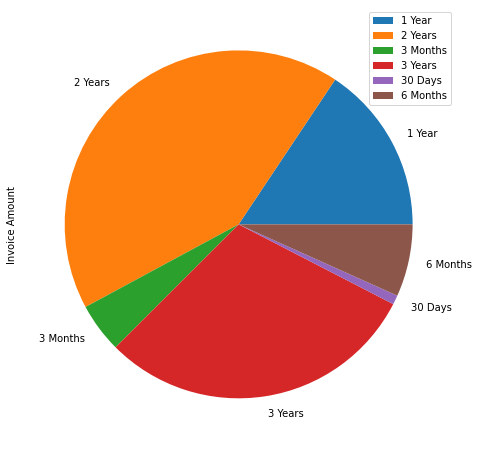

In [28]:
# Subscription quantity per subscription type
atlas.groupby(["Subscription"]).mean().plot.pie(x="Customers", y="Invoice Amount", figsize=(8, 8))
# TODO Subscription count per subscription type

# TODO hvplot forall

# TODO use new data (removes 18months 5months)

In [1]:
# Subscription quantity per subscription type
atlas_grouped__year_subscription__mean  = atlas_ymq.groupby(["Year", "Subscription"]).sum()["Invoice Amount"].to_frame()
atlas_grouped__year_subscription__sum   = atlas_ymq.groupby(["Year", "Subscription"]).sum()["Invoice Amount"].to_frame()
atlas_grouped__year_subscription__count = atlas_ymq.groupby(["Year", "Subscription"]).count()["Invoice Amount"].to_frame()

plt__atlas_grouped__year_subscription__mean = tool_plot_building.generate_plot__px_bar(
    data=atlas_grouped__year_subscription__mean.reset_index(),
    x="Year",
    y="Invoice Amount",
    color="Subscription",
    title="Avg. Invoice per Subscription: 2015 - 2020",
    ylabel="Invoice Amount ($)",
    barmode="group", width=800, height=400
    )

plt__atlas_grouped__year_subscription__sum = tool_plot_building.generate_plot__px_bar(
    data=atlas_grouped__year_subscription__sum.reset_index(),
    x="Year",
    y="Invoice Amount",
    color="Subscription",
    title="Total Invoice Amount per Subscription: 2015 - 2020",
    ylabel="Invoice Amount ($)",
    barmode="group", width=800, height=400
    )

plt__atlas_grouped__year_subscription__count = tool_plot_building.generate_plot__px_bar(
    data=atlas_grouped__year_subscription__count.reset_index(),
    x="Year",
    y="Invoice Amount",
    color="Subscription",
    title="Nbr. Invoices per Subscription: 2015 - 2020",
    ylabel="Nbr. of Invoices",
    barmode="group", width=800, height=400
    )

pn.Column(
    plt__atlas_grouped__year_subscription__mean.show(),
    plt__atlas_grouped__year_subscription__sum.show(),
    plt__atlas_grouped__year_subscription__count.show()
)



# plt__atlas_grouped__year_subscription__count.show()

# .plot.pie(x="Customers", y="Invoice Amount", figsize=(8, 8))


# TODO Subscription count per subscription type

# TODO hvplot forall

# TODO use new data (removes 18months 5months)


NameError: name 'atlas_ymq' is not defined

In [16]:
plt__atlas_grouped__year_subscription__mean

In [17]:
plt__atlas_grouped__year_subscription__sum

In [18]:
plt__atlas_grouped__year_subscription__count

In [45]:
# plot using go.bar()???
import plotly.graph_objs as go

from plotly import subplots
plot_group = subplots.make_subplots(rows=3, cols=1)




plt__atlas_grouped__year_subscription__mean = go.Bar(
    data=atlas_grouped__year_subscription__mean.reset_index(),
    x="Year",
    y="Invoice Amount",
    color="Subscription",
    title="Avg. Invoice per Subscription: 2015 - 2020",
    ylabel="Invoice Amount ($)",
    barmode="group", width=800, height=400
    )




plot_group.append_trace(plt__atlas_grouped__year_subscription__mean, 1, 1)
# plot_group.append_trace(plt__atlas_grouped__year_subscription__sum, 2, 1)
# plot_group.append_trace(plt__atlas_grouped__year_subscription__count, 3, 1)

pn.pane.Plotly(plot_group)




ValueError: 
    Invalid value of type 'builtins.str' received for the 'x' property of bar
        Received value: 'Year'

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

In [19]:
# demo to get different plot sizes
pn.Column(plt__atlas_grouped__year_subscription__sum, plt__atlas_grouped__year_subscription__count)


pn.extension('plotly')



Column
    [0] Plotly(Figure)
    [1] Plotly(Figure)

In [24]:
# testing plotly express again...

plt__atlas_grouped__year_subscription__mean = tool_plot_building.generate_plot__hvplot_bar(
    data=atlas_grouped__year_subscription__mean,
    title="Avg. Invoice Amount per Subscription: 2015 - 2020",
    xlabel="Year",
    ylabel="Invoice Amount ($)",
    stacked=False, rot=90
    )
plt__atlas_grouped__year_subscription__sum = tool_plot_building.generate_plot__hvplot_bar(
    data=atlas_grouped__year_subscription__sum,
    title="Total Invoice Amount per Subscription: 2015 - 2020",
    xlabel="Year",
    ylabel="Invoice Amount ($)",
    stacked=False, rot=90
    )
plt__atlas_grouped__year_subscription__count = tool_plot_building.generate_plot__hvplot_bar(
    data=atlas_grouped__year_subscription__count,
    title="Nbr. Invoices per Subscription: 2015 - 2020",
    xlabel="Year",
    ylabel="Nbr. of Invoices",
    stacked=False, rot=90
    )


from plotly import subplots
plot_group = subplots.make_subplots(rows=3, cols=1)

plot_group.append_trace(plt__atlas_grouped__year_subscription__mean, 1, 1)
plot_group.append_trace(plt__atlas_grouped__year_subscription__sum, 2, 1)
plot_group.append_trace(plt__atlas_grouped__year_subscription__count, 3, 1)

pn.pane.Plotly(plot_group)

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [:Bars   [Year,Subscription]   (Invoice Amount)]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'barpolar', 'box',
                     'candlestick', 'carpet', 'choropleth',
                     'choroplethmapbox', 'cone', 'contour',
                     'contourcarpet', 'densitymapbox', 'funnel',
                     'funnelarea', 'heatmap', 'heatmapgl',
                     'histogram', 'histogram2d',
                     'histogram2dcontour', 'image', 'indicator',
                     'isosurface', 'mesh3d', 'ohlc', 'parcats',
                     'parcoords', 'pie', 'pointcloud', 'sankey',
                     'scatter', 'scatter3d', 'scattercarpet',
                     'scattergeo', 'scattergl', 'scattermapbox',
                     'scatterpolar', 'scatterpolargl',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [42]:
import plotly.graph_objs as go
from plotly import subplots

heatmap = go.Heatmap(
    z=[[1, 20, 30],
       [20, 1, 60],
       [30, 60, 1]],
    showscale=False)

y0 = np.random.randn(50)
y1 = np.random.randn(50)+1

box_1 = go.Box(y=y0)
box_2 = go.Box(y=y1)
data = [heatmap, box_1, box_2]

fig = subplots.make_subplots(
    rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
    subplot_titles=('First Subplot','Second Subplot', 'Third Subplot')
)

fig.append_trace(plt__atlas_grouped__year_subscription__mean, 1, 1)
fig.append_trace(box_2, 1, 2)
fig.append_trace(heatmap, 2, 1)

fig['layout'].update(height=600, width=600, title='i <3 subplots')
fig = fig.to_dict()

subplot_panel = pn.pane.Plotly(fig)
subplot_panel.show()

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Subscription=1 Year<br>Year=%{x}<br>Invoice Amount=%{y}<extra></extra>',
              'legendgroup': '1 Year',
              'marker': {'color': '#636efa'},
              'name': '1 Year',
              'offsetgroup': '1 Year',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([2015., 2016., 2017., 2018., 2019., 2020.]),
              'xaxis': 'x',
              'y': array([137350.  , 204216.67, 205366.67, 168576.67, 136993.43, 714231.95]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Subscription=3 Years<br>Year=%{x}<br>Invoice Amount=%{y}<extra></extra>',
              'legendgroup': '3 Years',
              'marker': {'color': '#EF553B'},
              'name': '3 Years',
              'offsetgroup': '3 Years',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([2016., 2017., 2018., 2019., 2020.]),
              'xaxis': 'x',
              'y': array([ 92500., 131039.,  70630.,  72245., 124752.]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Subscription=2 Years<br>Year=%{x}<br>Invoice Amount=%{y}<extra></extra>',
              'legendgroup': '2 Years',
              'marker': {'color': '#00cc96'},
              'name': '2 Years',
              'offsetgroup': '2 Years',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([2017., 2020.]),
              'xaxis': 'x',
              'y': array([13500., 16000.]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Subscription=6 Months<br>Year=%{x}<br>Invoice Amount=%{y}<extra></extra>',
              'legendgroup': '6 Months',
              'marker': {'color': '#ab63fa'},
              'name': '6 Months',
              'offsetgroup': '6 Months',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([2019., 2020.]),
              'xaxis': 'x',
              'y': array([ 1250., 66051.]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Subscription=3 Months<br>Year=%{x}<br>Invoice Amount=%{y}<extra></extra>',
              'legendgroup': '3 Months',
              'marker': {'color': '#FFA15A'},
              'name': '3 Months',
              'offsetgroup': '3 Months',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([2020.]),
              'xaxis': 'x',
              'y': array([125603.84]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'group',
               'height': 400,
               'legend': {'title': {'text': 'Subscription'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Avg. Invoice per Subscription: 2015 - 2020'},
               'width': 800,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Year'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Invoice Amount ($)'}}}
})]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'barpolar', 'box',
                     'candlestick', 'carpet', 'choropleth',
                     'choroplethmapbox', 'cone', 'contour',
                     'contourcarpet', 'densitymapbox', 'funnel',
                     'funnelarea', 'heatmap', 'heatmapgl',
                     'histogram', 'histogram2d',
                     'histogram2dcontour', 'image', 'indicator',
                     'isosurface', 'mesh3d', 'ohlc', 'parcats',
                     'parcoords', 'pie', 'pointcloud', 'sankey',
                     'scatter', 'scatter3d', 'scattercarpet',
                     'scattergeo', 'scattergl', 'scattermapbox',
                     'scatterpolar', 'scatterpolargl',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

# Top Paying Customers

In [17]:
# All time
n_customers = 20
atlas_topcustomers_alltime = atlas_ymq.groupby("Customers") \
    .sum() \
    .sort_values("Invoice Amount", ascending=False) \
    .iloc[:n_customers] \
    .loc[:, ["Number of Users", "Invoice Amount"]]
plt_atlas_topcustomers_alltime = atlas_topcustomers_alltime["Invoice Amount"].hvplot.bar(
    title=f"Top {n_customers} Customers by Total Invoiced Amount: 2015 - 2020",
    ylabel="Invoice Amount ($)",
    color="green",
    width=800, height=500, rot=90, yformatter="$%.0f"
    )

# Per Year TODO not fully accurate
n_customers = 8
atlas_topcustomers_peryear = atlas_ymq.groupby(["Year", "Customers"]) \
    .sum() \
    .sort_values("Invoice Amount", ascending=False) \
    .iloc[:n_customers] \
    .loc[:, ["Number of Users", "Invoice Amount"]]
plt__atlas_topcustomers_peryear = atlas_topcustomers_peryear["Invoice Amount"].hvplot.bar(
    title=f"Top {n_customers} Customers by Annual Invoiced Amount: 2015 - 2020",
    ylabel="Invoice Amount ($)",
    color="green",
    width=plot_width__large, height=plot_height__large, rot=90, yformatter="$%.0f"
    )

# Display
pn.Column(
    plt_atlas_topcustomers_alltime,
    atlas_topcustomers_alltime.head(),

    plt__atlas_topcustomers_peryear,
    atlas_topcustomers_peryear
)


Column
    [0] HoloViews(Bars)
    [1] DataFrame(DataFrame)
    [2] HoloViews(Bars)
    [3] DataFrame(DataFrame)

# New Customers

In [18]:
atlas_ymq.reset_index().set_index("Customers").sort_index() \
    .groupby



# groupby(["Monthly", "Customers"]) \
    # .count() \
    # .sort_values("Invoice Amount", ascending=False) \
    # .loc[:, ["Number of Users", "Invoice Amount"]]

<bound method DataFrame.groupby of                                                         Service Start  \
Customers                                                               
Alabama A&M University-College of Education 2018-03-21 00:00:00-04:00   
Albertus Magnus College                     2018-09-01 00:00:00-04:00   
Albuquerque Public Schools                  2018-11-19 00:00:00-05:00   
Alcorn State University                     2017-08-31 00:00:00-04:00   
Alderson Broaddus University                2020-10-02 00:00:00-04:00   
...                                                               ...   
Winthrop University                         2020-09-30 00:00:00-04:00   
Winthrop University                         2019-09-20 00:00:00-04:00   
Yakima Valley College                       2020-09-18 00:00:00-04:00   
Young Harris College/Miller Library         2018-11-27 00:00:00-05:00   
Young Harris College/Miller Library         2019-11-30 00:00:00-05:00   

               

In [19]:
atlas_ymq.dropna()

,Customers,Number of Users,Invoice Date,Invoice #,Invoice Amount,Subscription,Account Code,Address,Lat,Long,Service End,Subscription Duration,Year,Monthly,Quarterly
Service Start,,,,,,,,,,,,,,,
2015-06-01 00:00:00-04:00,Emporia State University,250.0,2015-05-28 00:00:00-04:00,AJ501,3500.00,1 Year,4700-0-00-00000-16-0000,"1 Kellogg Cir, Emporia, KS 66801",38.392609,-96.181396,2016-06-30 00:00:00-04:00,365 days,2015.0,6.0,2.0
2015-06-10 00:00:00-04:00,Morehead State University,100.0,2015-06-23 00:00:00-04:00,AJ502,3500.00,1 Year,4700-0-00-00000-17-0000,"150 University Blvd, Morehead, KY 40351",38.184921,-83.434441,2016-06-30 00:00:00-04:00,365 days,2015.0,6.0,2.0
2015-10-22 00:00:00-04:00,College of William and Mary,250.0,2015-12-17 00:00:00-05:00,AJ508,3500.00,1 Year,4700-0-00-00000-00-0000,"200 Stadium Dr, Williamsburg, VA 23185",37.271740,-76.714260,2016-10-31 00:00:00-04:00,365 days,2015.0,10.0,4.0
2016-01-06 00:00:00-05:00,University of Kentucky,250.0,2016-01-12 00:00:00-05:00,AJ511,3500.00,1 Year,4700-0-00-00000-00-0000,"129 Taylor Education Bldg, Lexington, KY 40506",37.986014,-84.396001,2017-06-30 00:00:00-04:00,365 days,2016.0,1.0,1.0
2016-01-07 00:00:00-05:00,Illinois College,250.0,2016-01-11 00:00:00-05:00,AJ510,2166.67,1 Year,4700-0-00-00000-00-0000,"1101 W College Ave, Jacksonville, IL 62650",39.732210,-90.246947,2017-01-31 00:00:00-05:00,365 days,2016.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01 00:00:00-04:00,Bowling Green State University,358.0,2020-09-17 00:00:00-04:00,NB091720A,1270.00,3 Months,4700-0-00-00000-00-0000,"101 Education Bldg., BGSU, Bowling Green, OH ...",41.379729,-83.622879,2020-12-30 00:00:00-05:00,90 days,2020.0,10.0,4.0
2020-10-02 00:00:00-04:00,Alderson Broaddus University,50.0,2020-10-07 00:00:00-04:00,NB100820K,500.00,3 Months,4700-0-00-00000-00-0000,"101 College Hill Rd, Philippi, WV 26416",39.160261,-80.049048,2020-12-31 00:00:00-05:00,90 days,2020.0,10.0,4.0
2020-10-14 00:00:00-04:00,Capital University,14.0,2020-10-15 00:00:00-04:00,NB101520A,1640.00,1 Year,4700-0-00-00000-00-0000,"E Main St & College Ave, Bexley, OH 43209",39.957227,-82.940015,2021-10-31 00:00:00-04:00,365 days,2020.0,10.0,4.0


In [20]:
atlas_ymq.dtypes

Customers                                          object
Number of Users                                   float64
Invoice Date             datetime64[ns, America/New_York]
Invoice #                                          object
Invoice Amount                                    float64
Subscription                                       object
Account Code                                       object
Address                                            object
Lat                                               float64
Long                                              float64
Service End              datetime64[ns, America/New_York]
Subscription Duration                     timedelta64[ns]
Year                                              float64
Monthly                                           float64
Quarterly                                         float64
dtype: object

In [21]:
group_year = atlas_ymq.groupby(["Year"])["Invoice Amount"].sum()
group_year

Year
2015.0     137350.00
2016.0     296716.67
2017.0     349905.67
2018.0     239206.67
2019.0     210488.43
2020.0    1046638.79
Name: Invoice Amount, dtype: float64

In [22]:
group_year_customers = atlas_ymq.groupby(["Year"])["Number of Users"].sum()

In [23]:
group_year_customers

Year
2015.0      600.0
2016.0    13055.0
2017.0     8855.0
2018.0     2275.0
2019.0     6261.0
2020.0    87170.0
Name: Number of Users, dtype: float64

In [24]:
atlas_ymq_filtered = atlas_ymq[atlas_ymq["Year"] == 2020]
atlas_ymq_filtered_cumsum = atlas_ymq_filtered.loc[:, ["Invoice Amount", "Number of Users", "Subscription Duration"]].cumsum(axis=0)

invoice_trend_standard_plot = atlas_ymq_filtered_cumsum.hvplot.line(
    x="Service Start",
    y=["Invoice Amount", "Number of Users"],
    # y=["Invoice Amount", "Number of Users", "Subscription Duration"],
    xlabel="Nbr Users",
    ylabel="Invoice Amount ($)",
    title="Invoice Amount (2020)",
    width=1000
)

invoice_trend_log_plot = atlas_ymq_filtered_cumsum.hvplot.line(
    x="Service Start",
    y=["Invoice Amount", "Number of Users"],
    # y=["Invoice Amount", "Number of Users", "Subscription Duration"],
    xlabel="Nbr Users",
    ylabel="Invoice Amount ($)",
    title="Invoice Amount (2020)",
    width=1000,
    logy=True
)

invoice_trend_barh_plot = atlas_ymq_filtered_cumsum.hvplot.barh(
    x="Service Start",
    y=["Invoice Amount", "Number of Users"],
    # y=["Invoice Amount", "Number of Users", "Subscription Duration"],
    xlabel="Nbr Users",
    ylabel="Invoice Amount ($)",
    title="Invoice Amount (2020)",
    width=1000,
    height=5000
)

pn.Column(invoice_trend_standard_plot, invoice_trend_log_plot,
#  invoice_trend_barh_plot
)

Column
    [0] HoloViews(NdOverlay)
    [1] HoloViews(NdOverlay)

In [25]:
# Calculate the mean values for each neighborhood
#rankings_pd.rename(columns = {'test':'TEST', 'odi':'ODI', 
#                              't20':'T20'}, inplace = True) 

#atlas2.columns = ["Customers", "Lat", "Long"]

mean_data = atlas.groupby(["Customers"]).mean()
mean_data.reset_index(inplace=True)
mean_data.dropna(inplace=True)
mean_data


,Customers,Number of Users,Invoice Amount,Lat,Long
4,Alderson Broaddus University,50.000000,500.0,39.160261,-80.049048
5,Alverno College,125.000000,2750.0,42.983074,-87.967247
8,Anderson University,170.000000,800.0,34.513986,-82.638732
9,Appalachian State University,50.000000,2000.0,36.211015,-81.677700
10,Appalachian State University,370.000000,3700.0,36.211015,-81.677700
...,...,...,...,...,...
424,University of the Cumberland,250.000000,3500.0,36.737027,-84.162826
433,Walla Walla Public Schools,145.000000,2650.0,46.065081,-118.329587
437,Western Governors University,3350.000000,25500.0,40.684882,-111.869961
447,Winthrop University,191.666667,812.5,34.938466,-81.029872


In [26]:
# px.set_mapbox_access_token(mapbox_token)
# map = px.scatter_mapbox(
#     mean_data,
#     lat="Lat",
#     lon="Long",
#     size="Invoice Amount",
#     color="Customers",
#     title="Mean Invoice Amount ($)",
#     width=1500,
#     height=800
#     # mapbox_style = 'stamen-watercolor'
# )
# map.show()

In [27]:

total_data = atlas.groupby(["Customers"]).sum()
total_data.reset_index(inplace=True)
total_data.dropna(inplace=True)
total_data


,Customers,Number of Users,Invoice Amount,Lat,Long
0,Alabama A&M University-College of Education,0.0,5460.0,34.785061,-86.573280
1,Albertus Magnus College,0.0,5670.0,41.331299,-72.921440
2,Albuquerque Public Schools,0.0,2270.0,35.092410,-106.642950
3,Alcorn State University,0.0,1700.0,31.875710,-91.141739
4,Alderson Broaddus University,50.0,500.0,39.160261,-80.049048
...,...,...,...,...,...
446,Winston-Salem State University,75.0,562.0,0.000000,0.000000
447,Winthrop University,575.0,4062.5,174.692330,-405.149360
448,Winthrop University,100.0,2000.0,69.876932,-162.059744
449,Yakima Valley College,56.0,1030.0,0.000000,0.000000


In [28]:
# px.set_mapbox_access_token(mapbox_token)
# map = px.scatter_mapbox(
#     total_data,
#     lat="Lat",
#     lon="Long",
#     size="Invoice Amount",
#     color="Customers",
#     title="# Total Invoice Amount ($)",
#     width=1500,
#     height=800,
#     mapbox_style = 'basic'
# )
# map.show()

In [29]:
# def neighborhood_map():
#     """Neighborhood Map"""
#      = atlas2.groupby(["Customers"]).mean()
#     mean_data.reset_index(inplace=True)
#     px.set_mapbox_access_token(mapbox_token)
#     neighborhood_map_plot = px.scatter_mapbox(
#             mean_data,
#             lat="Lat",
#             lon="Long",
#             size="Subscription",
#             color="Customer"
#         )
#     return neighborhood_map_plot
# neighborhood_map()

In [30]:
# Identify existing and potential customers
customer_name_mapping               = tool_lookup_tables.read_customer_name_mapping()
all_potential_customers_mapping     = tool_lookup_tables.read_lookup_table(constants.LUT_POTENTIAL_CUSTOMER_NAME_FILE_PATH)

paying_customers = list(customer_name_mapping.keys())
all_potential_customers = list(all_potential_customers_mapping.keys())

customers_df = pd.DataFrame([paying_customers, all_potential_customers])
customers_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3825,3826,3827,3828,3829,3830,3831,3832,3833,3834
0,Louisiana Board of Regents,Emporia State University,Morehead State University,State University of NY Potsdam,ST. Mary's College of Maryland,Clark County Education Association,Bureau of Indian Affairs,College of William and Mary,Georgia College and State University,Illinois College,...,None,None,None,None,None,None,None,None,None,None
1,Aaniiih Nakoda College,Abdullah Gul University,Abertay University,Aberystwyth,Aberystwyth University,Abilene Christian University,Abraham Baldwin Agricultural College,Academy College,Academy of Art University,Ada University,...,York Technical College,York University,Young Harris College,Youngstown State University,YTI Career Institute: Altoona,YTI Career Institute: Lancaster,YTI Career Institute: York,Yuba College,Zane State College,Zouk Mosbeh


In [31]:
# Calculate market penetration

# TODO remove duplicates
# TODO Match names
# TODO Generate pie chart

nbr_paying_customers = len(paying_customers)
nbr_potential_customers = len(all_potential_customers)
market_penetration = nbr_paying_customers / nbr_potential_customers

## Print results
print(f"The number of paying cusomters is {nbr_paying_customers}")
print(f"The number of potential cusomters is {nbr_potential_customers}")
print(f"Market penetration is {market_penetration * 100} %")

## Generate heatmap
# all_potential_customers   .hvplot.heatmap(x='time.month', y='time.day', C='temperature', 
#                   height=500, width=500, colorbar=False)


The number of paying cusomters is 670
The number of potential cusomters is 3835
Market penetration is 17.470664928292045 %


In [32]:
atlas2_ymq_filtered.head(2)

NameError: name 'atlas2_ymq_filtered' is not defined

In [539]:
# Generate heatmap
atlas2_ymq_filtered.reset_index().hvplot.heatmap(x='Lat', y='Long', C='Invoice Amount', 
                  height=500, width=500, colorbar=False)


:HeatMap   [Lat,Long]   (Invoice Amount)

In [63]:
atlas["Number of Users"].reset_index()

,Customers,Number of Users
0,Louisiana Board of Regents,NaN
1,Emporia State University,250.0
2,Morehead State University,100.0
3,State University of NY Potsdam,NaN
4,ST. Mary's College of Maryland,NaN
...,...,...
664,"University of California, Riverside",75.0
665,"CTU Foundation, Inc",NaN
666,Felician University,20.0
667,NEA Vermont,NaN


In [71]:
# Number of customers per state plots, top 15 (bar, map)
num_customers = 15

# TODO Parse address or lat/lon to get the state: https://docs.mapbox.com/api/search/#forward-geocoding

states = pd.DataFrame(["VA"] * atlas.shape[0])

df = pd.concat([states, atlas["Number of Users"].reset_index()], axis="columns", join="inner")

# df = atlas["Number of Users"]
# df.append(states)
# df = pd.DataFrame([states, atlas["Number of Users"]])
# df.plot()

df.hvplot.bar()

:Bars   [index]   (Number of Users)